In [1]:
## Lesson 3 CamVid Tiramisu
%reload_ext autoreload
%autoreload 1
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *
#import matplotlib.pyplot as plt

import os
cwd = os.getcwd()

path = Path(cwd + '/data/')
path.ls()

[PosixPath('/home/thor/School/Scripts/data/metalImages'),
 PosixPath('/home/thor/School/Scripts/data/xargs'),
 PosixPath('/home/thor/School/Scripts/data/images'),
 PosixPath('/home/thor/School/Scripts/data/NoBoneImages.txt'),
 PosixPath('/home/thor/School/Scripts/data/valid_old.txt'),
 PosixPath('/home/thor/School/Scripts/data/MetalImagesToDuplicate.txt'),
 PosixPath('/home/thor/School/Scripts/data/noBone'),
 PosixPath('/home/thor/School/Scripts/data/masks'),
 PosixPath('/home/thor/School/Scripts/data/valid.txt'),
 PosixPath('/home/thor/School/Scripts/data/MetalImages.txt'),
 PosixPath('/home/thor/School/Scripts/data/FullDatasett.zip')]

In [45]:
# a = torch.empty(5, 7, dtype=torch.float)
a[0,0] = 2
a[2,2] = 3
a[2,4] = 2
a, a.size(), np.argwhere(a > 1)[0]

(tensor([[2.0000e+00, 3.0875e-41, 4.4842e-44, 1.3593e-43, 6.4460e-44, 1.6115e-43,
          1.4714e-43],
         [1.7096e-43, 1.4153e-43, 5.6052e-44, 5.7453e-44, 6.1657e-44, 4.4842e-44,
          1.5414e-43],
         [1.5695e-43, 6.4460e-44, 3.0000e+00, 1.5975e-43, 2.0000e+00, 1.6675e-43,
          1.4574e-43],
         [1.4153e-43, 1.5975e-43, 1.4153e-43, 5.6052e-44, 1.3593e-43, 4.4842e-44,
          8.6881e-44],
         [4.4842e-44, 6.8664e-44, 1.4153e-43, 6.3058e-44, 7.1466e-44, 5.7453e-44,
          1.4013e-45]]), torch.Size([5, 7]), tensor([0, 2, 2]))

In [9]:
a

array([[0.000000e+00, 0.000000e+00, 3.288567e-03, 4.589813e-41, 3.288530e-03, 4.589813e-41, 3.287282e-03],
       [4.589813e-41, 3.287319e-03, 4.589813e-41, 3.286332e-03, 4.589813e-41, 3.288381e-03, 4.589813e-41],
       [3.288362e-03, 4.589813e-41, 3.288399e-03, 4.589813e-41, 3.287263e-03, 4.589813e-41, 3.287300e-03],
       [4.589813e-41, 3.286313e-03, 4.589813e-41, 3.287207e-03, 4.589813e-41, 3.287245e-03, 4.589813e-41],
       [3.285922e-03, 4.589813e-41, 3.287189e-03, 4.589813e-41, 3.287226e-03, 4.589813e-41, 3.285885e-03]],
      dtype=float32)

In [37]:
path_img = path/'images'
img_names = get_image_files(path_img)
img_names[:10]

[PosixPath('/home/thor/School/Scripts/data/images/MAGNA_84_-1CL_0.00742182kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_12_-1CL_0.207773kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_31_82.4426CL_3.25246kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_68_80.6901CL_0.297131kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_47_65.3CL_3.18971kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_84_65.4446CL_2.76485kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_85_70.3106CL_3.39452kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_82_67.9813CL_3.39919kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_11_-1CL_0.18778kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/images/MAGNA_28_-1CL_0.685025kg.tif')]

In [30]:
path_lbl = path/'masks'
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/home/thor/School/Scripts/data/masks/MAGNA_84_-1CL_0.00742182kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/masks/MAGNA_12_-1CL_0.207773kg.tif'),
 PosixPath('/home/thor/School/Scripts/data/masks/MAGNA_31_82.4426CL_3.25246kg.tif')]

In [74]:
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, max_zoom=1.0, max_lighting=None, max_warp=0.2, p_affine=0.75, p_lighting=0.0)
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (dihedral_affine), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True)])

In [243]:
len(tfms), type(tfms)

(2, tuple)

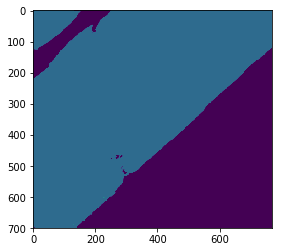

In [217]:
# Function that returns an image from its url
def get_img(img_url):
    return open_image(img_url)

# Function that displays many transformations of an image
def plots_of_one_image(img_url, tfms, rows=1, cols=3, width=15, height=5, **kwargs):
    img = get_img(img_url)
    img = img.apply_tfms(tfms, **kwargs)
    plt.figure()
    plt.imshow(img.data[0])
    plt.show()
                               
# for transform in tfms:
plots_of_one_image('/home/thor/School/Scripts/data/masks/MAGNA_3_86.3626CL_3.97524kg.tif',
                   RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True))
#                    RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-180.0, 180.0)}, p=1.0, resolved={}, do_run=True, is_random=True))

In [269]:
a = np.arange(10)
print(a)
print(np.random.choice(a, size=5, replace=False), a)

"/home/thor/stuff.txt".replace("/home/thor", "")

len(metal)

[0 1 2 3 4 5 6 7 8 9]
[1 8 5 2 6] [0 1 2 3 4 5 6 7 8 9]


16

In [279]:
# Select 10% validation images and handpicked meatl images
metal = ['MAGNA_3_86.3626CL_3.97524kg.tif',
'MAGNA_20_78.9422CL_0.960883kg.tif', 
'MAGNA_48_-1CL_0.437527kg.tif', 
'MAGNA_49_-1CL_0.440395kg.tif', 
'MAGNA_50_-1CL_0.317512kg.tif', 
'MAGNA_51_-1CL_0.453667kg.tif', 
'MAGNA_52_-1CL_0.360127kg.tif', 
'MAGNA_53_-1CL_0.446551kg.tif', 
'MAGNA_54_-1CL_0.441927kg.tif', 
'MAGNA_55_-1CL_0.454831kg.tif', 
'MAGNA_56_-1CL_0.446517kg.tif', 
'MAGNA_57_-1CL_0.442111kg.tif', 
'MAGNA_58_-1CL_0.453068kg.tif', 
'MAGNA_59_-1CL_0.328768kg.tif', 
'MAGNA_60_-1CL_0.439103kg.tif', 
'MAGNA_61_83.7706CL_3.88116kg.tif']

no_metal_names = np.array([img.name for img in img_names])
for metal_img in metal:
    no_metal_names = no_metal_names[no_metal_names != metal_img]

validation_count = len(no_metal_names) // 10 # 10% of the non-metal images
validation_files = np.random.choice(no_metal_names, size=validation_count, replace=False)
validation_files = np.append(validation_files,
                            ['MAGNA_56_-1CL_0.446517kg.tif', 'MAGNA_61_83.7706CL_3.88116kg.tif',
                             'MAGNA_54_-1CL_0.441927kg.tif'])

outF = open("data/valid.txt", "w")
output = map(lambda x: x + '\n', validation_files)
outF.writelines(output)
outF.close()

def error_measure(input, target):
    '''Computes the average number of incorrect number of contaminants in labeled image'''
    print(input)
    print(target)
    input_contaminants = np.argwhere(input < 1)  # 0 and 1 are belt and meat
    target_contaminants = np.argwhere(target < 1)
    
    print(input_contaminants, input_contaminants)
    
    count_incorrect = np.abs(input_contaminants - target_contaminants)
    mean_incorrect = count_incorrect.float().mean()
    
    print(count_incorrect, mean_incorrect)
    
    # raise Exception('Stuff')
    
    return mean_incorrect

/home/thor/School/Scripts/data/masks/MAGNA_3_86.3626CL_3.97524kg.tif


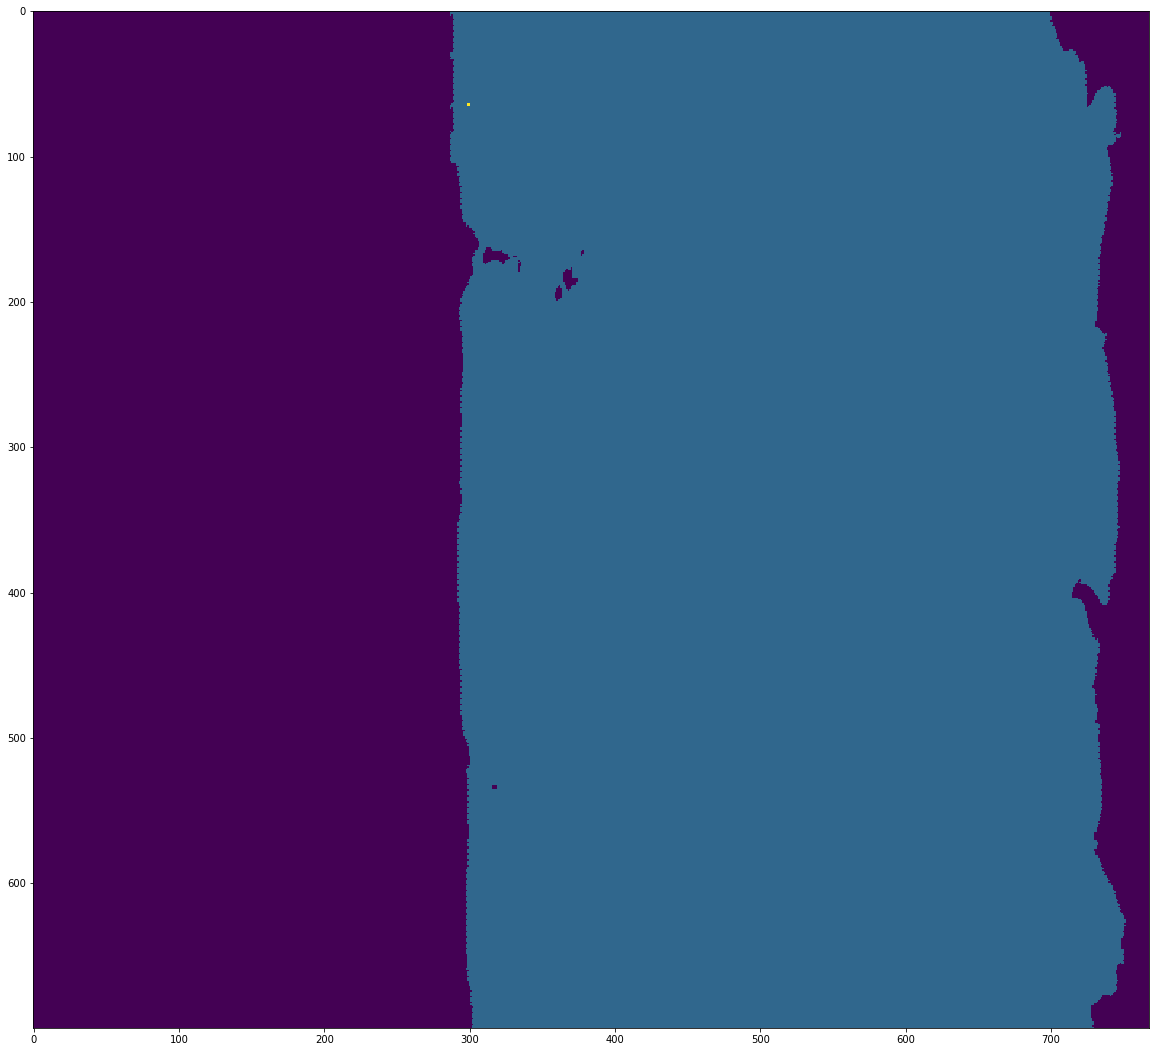

/home/thor/School/Scripts/data/masks/MAGNA_20_78.9422CL_0.960883kg.tif


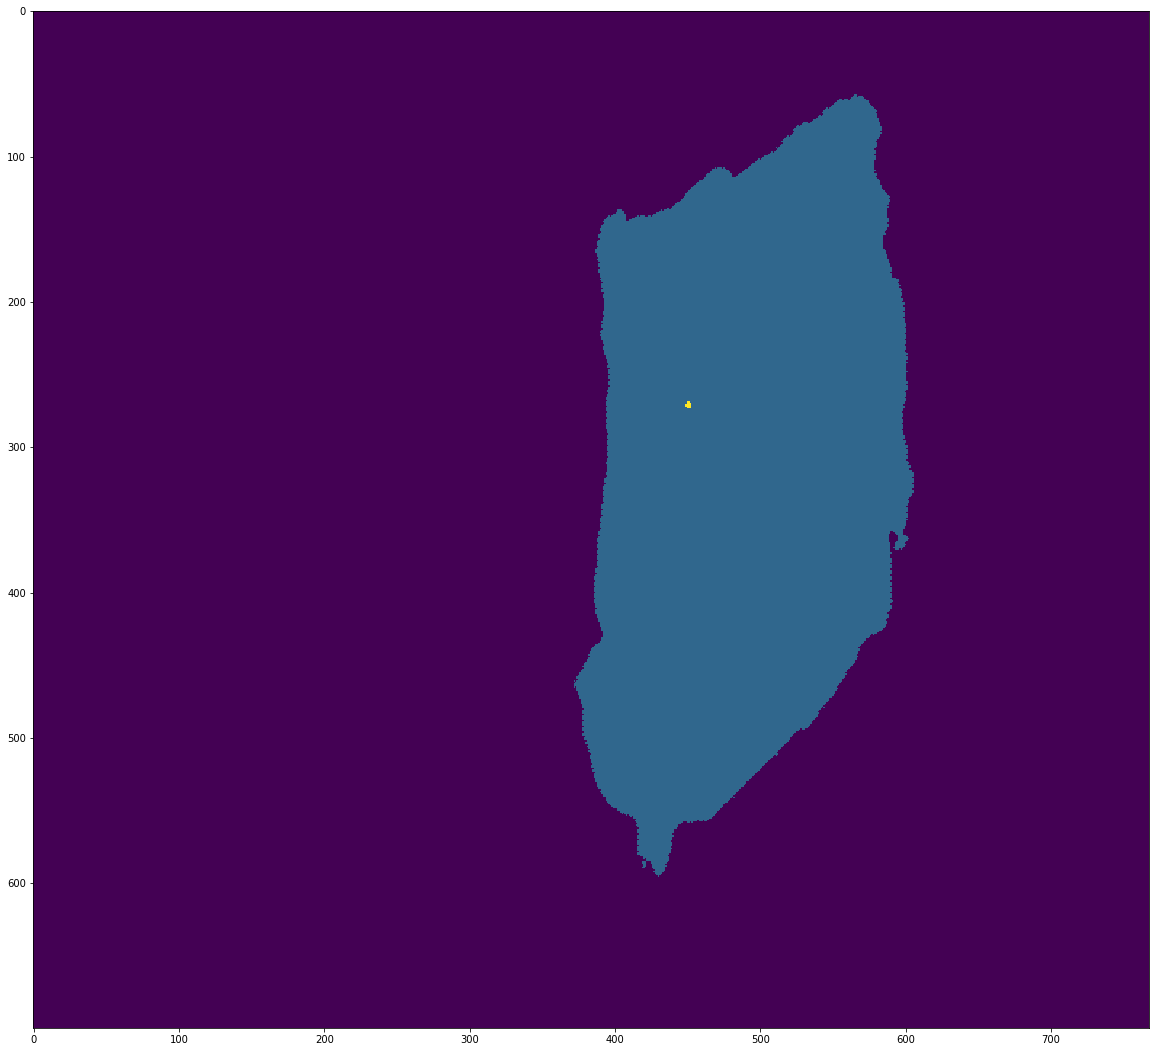

/home/thor/School/Scripts/data/masks/MAGNA_48_-1CL_0.437527kg.tif


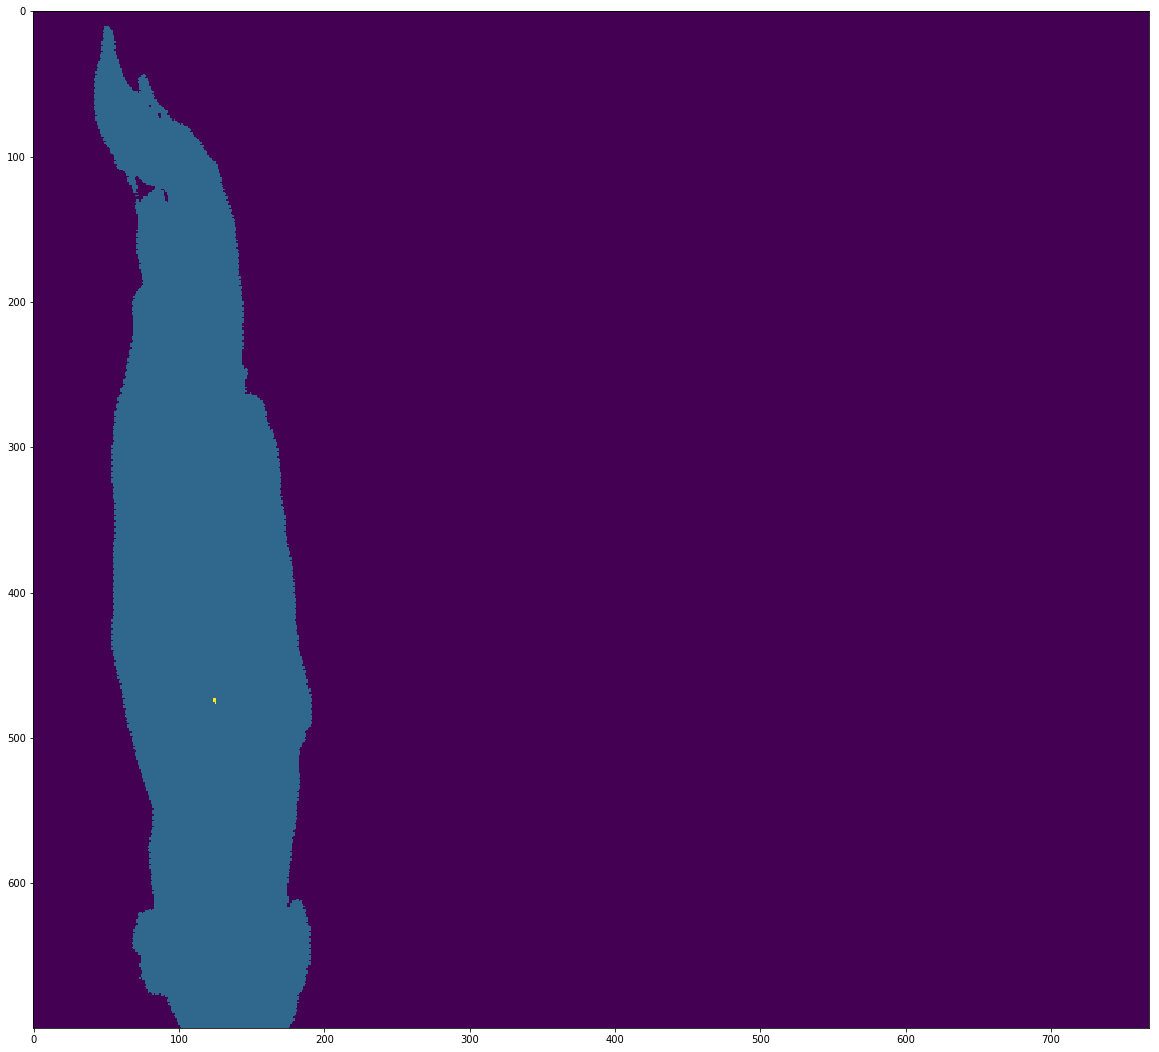

/home/thor/School/Scripts/data/masks/MAGNA_49_-1CL_0.440395kg.tif


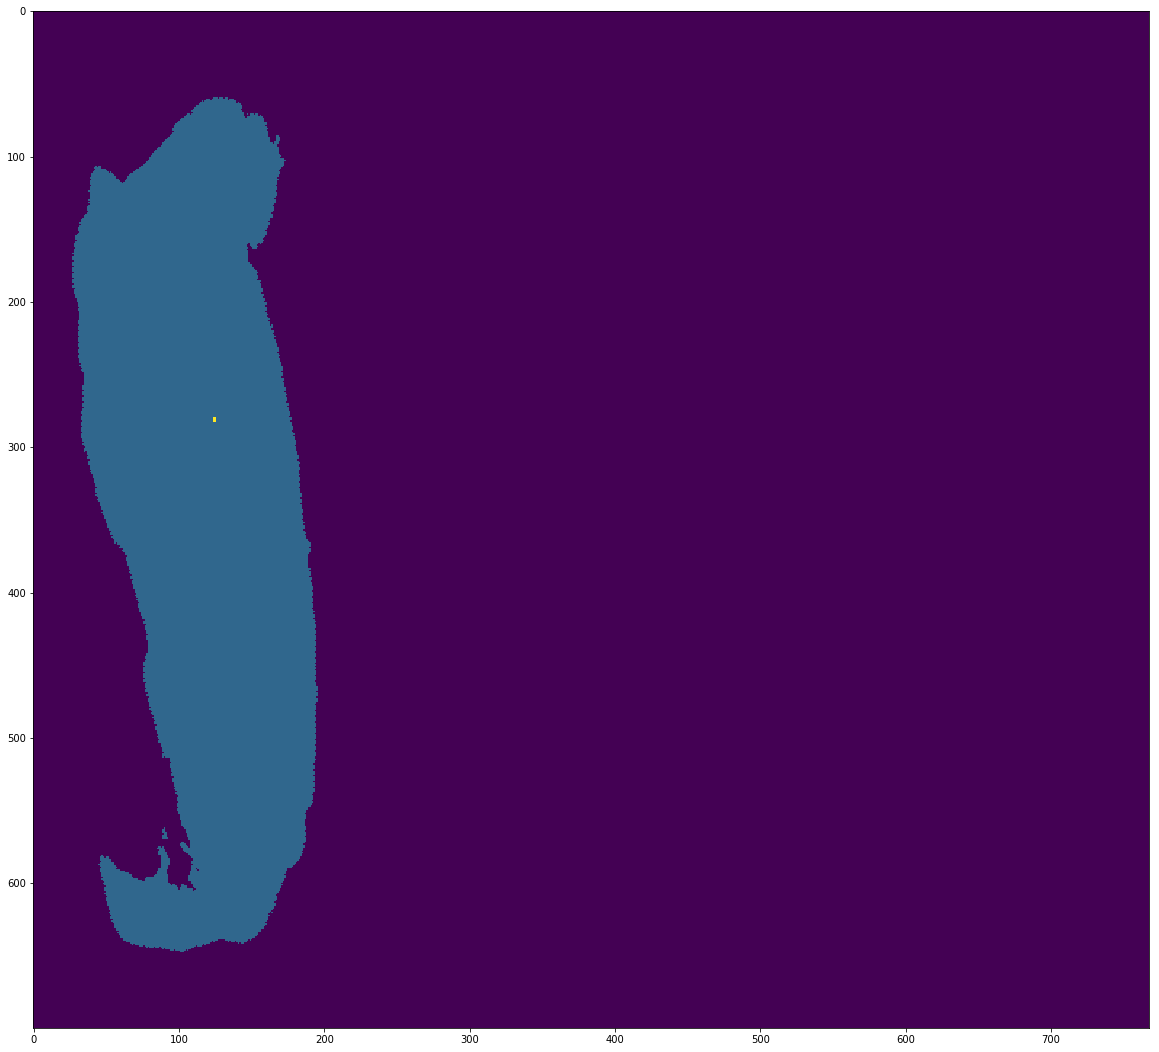

/home/thor/School/Scripts/data/masks/MAGNA_50_-1CL_0.317512kg.tif


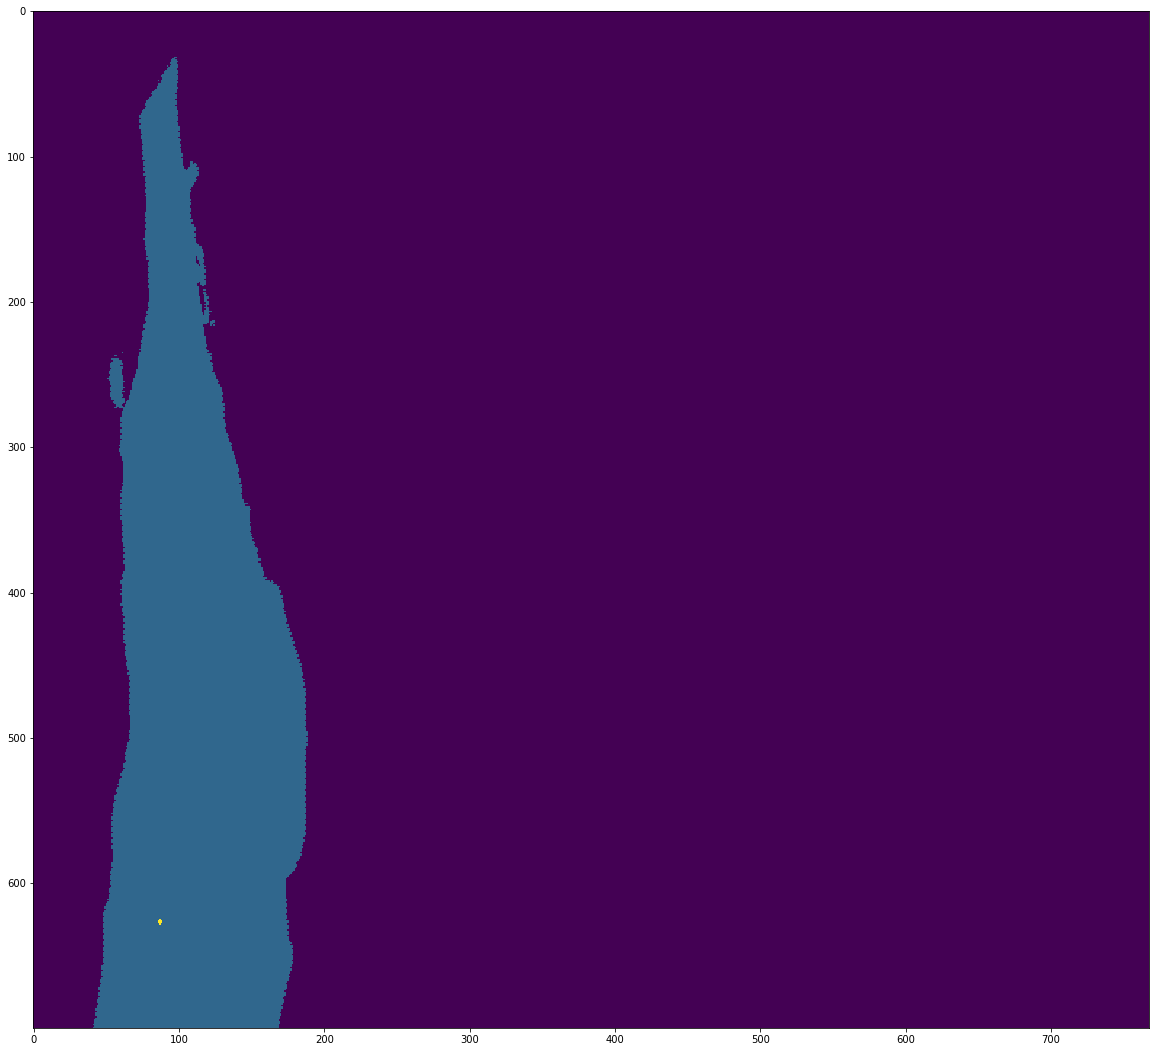

/home/thor/School/Scripts/data/masks/MAGNA_51_-1CL_0.453667kg.tif


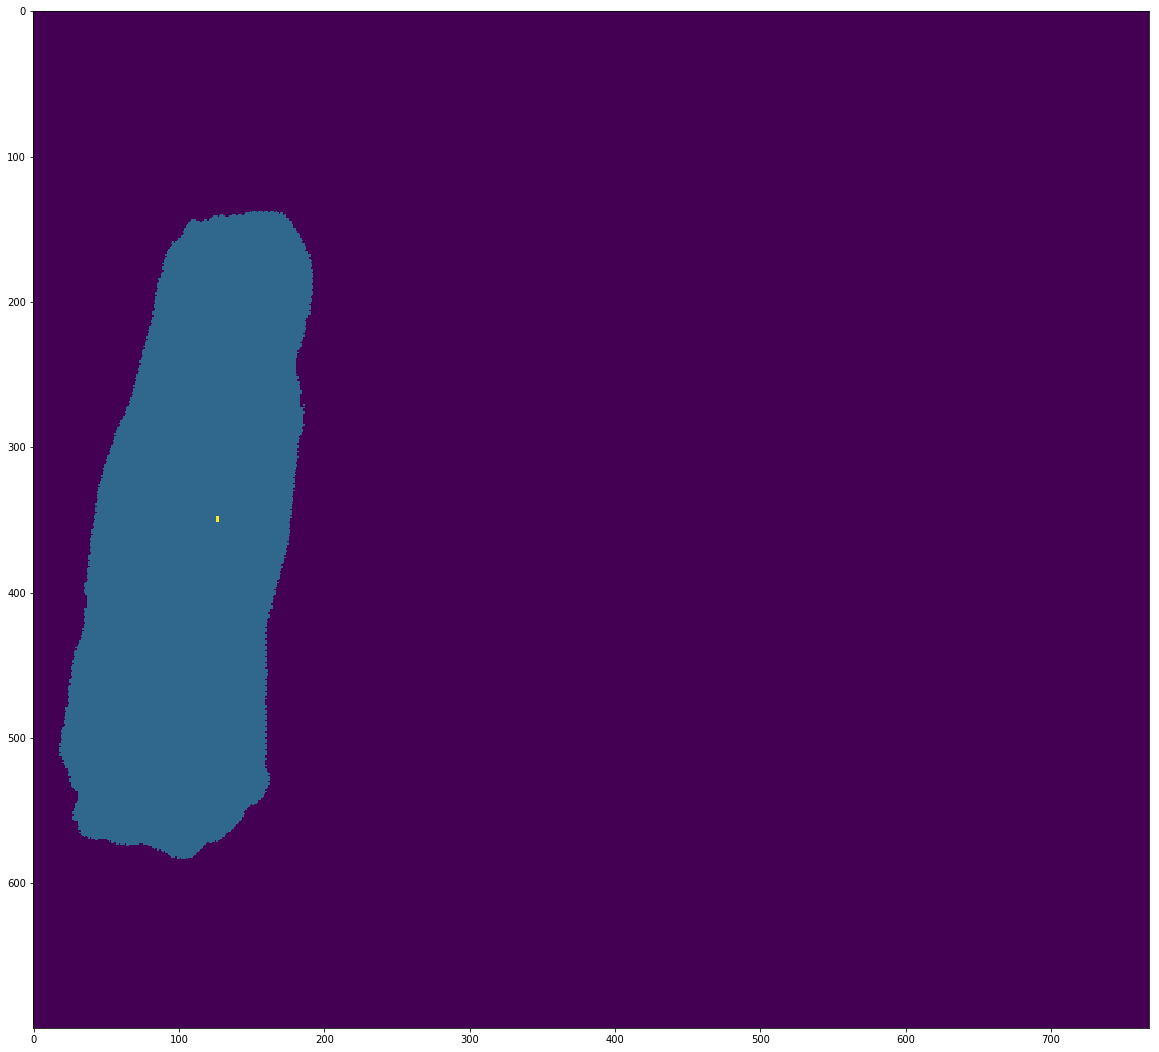

/home/thor/School/Scripts/data/masks/MAGNA_52_-1CL_0.360127kg.tif


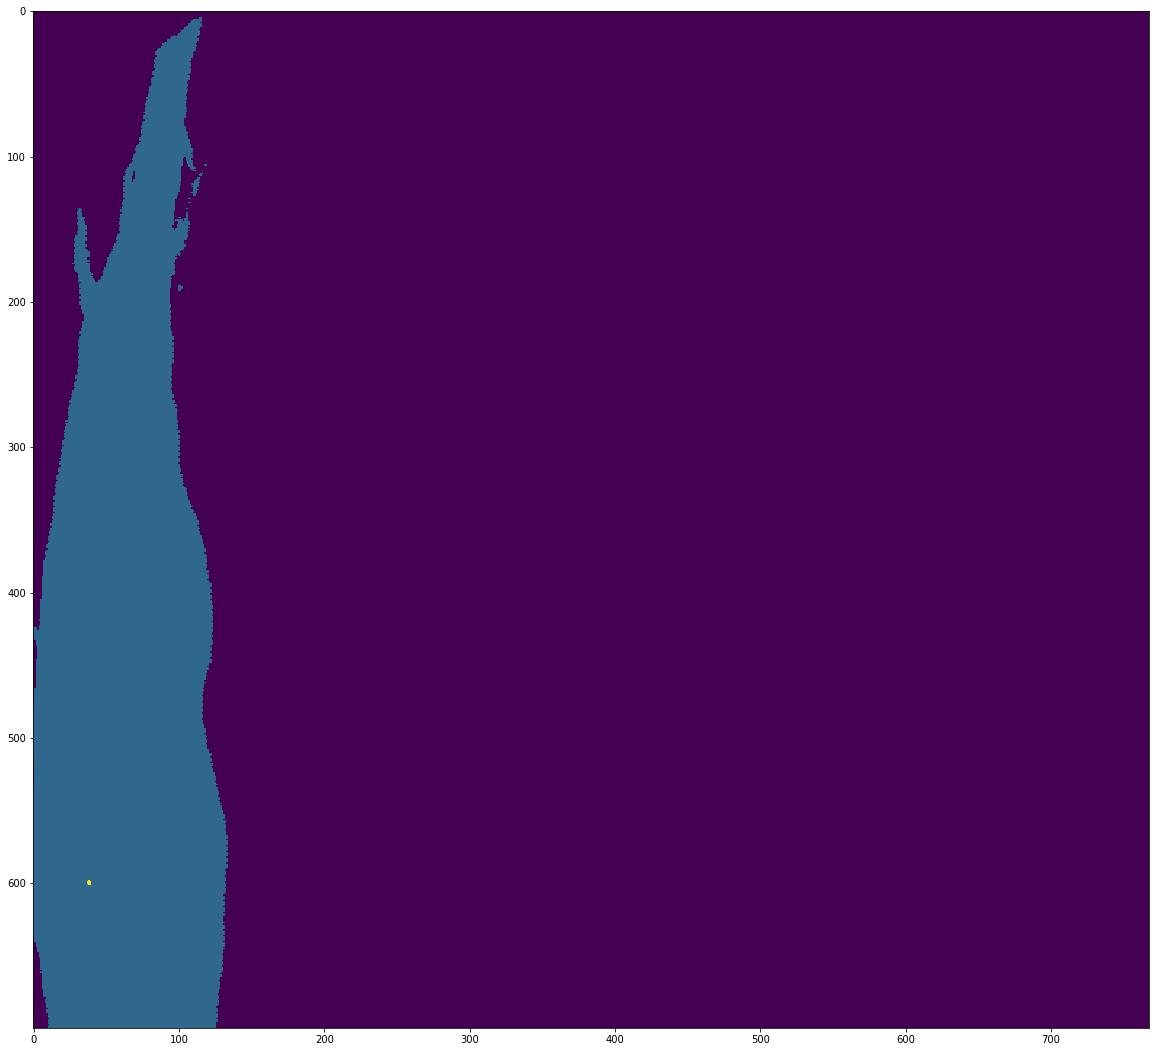

/home/thor/School/Scripts/data/masks/MAGNA_53_-1CL_0.446551kg.tif


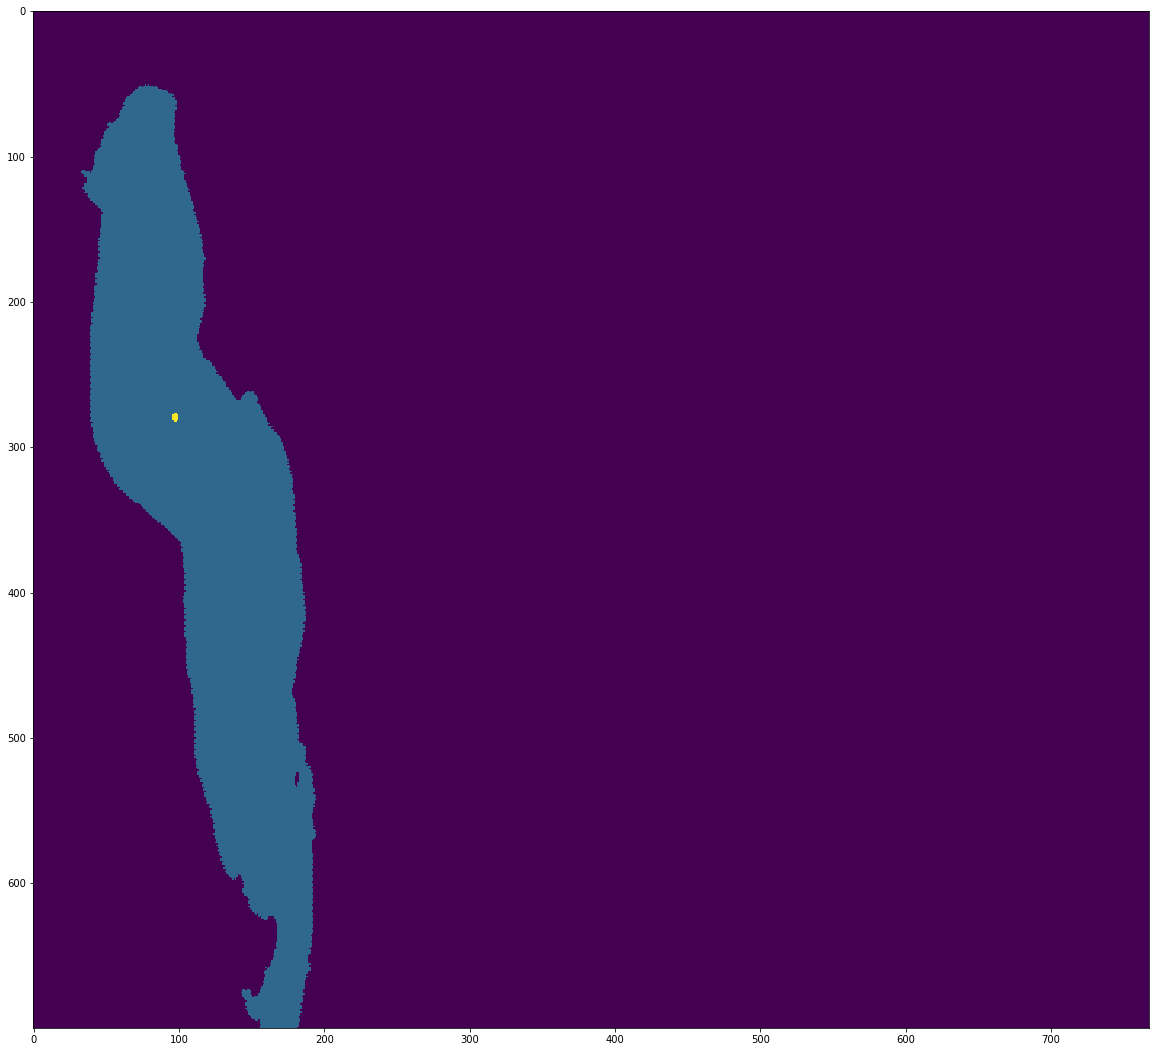

/home/thor/School/Scripts/data/masks/MAGNA_54_-1CL_0.441927kg.tif


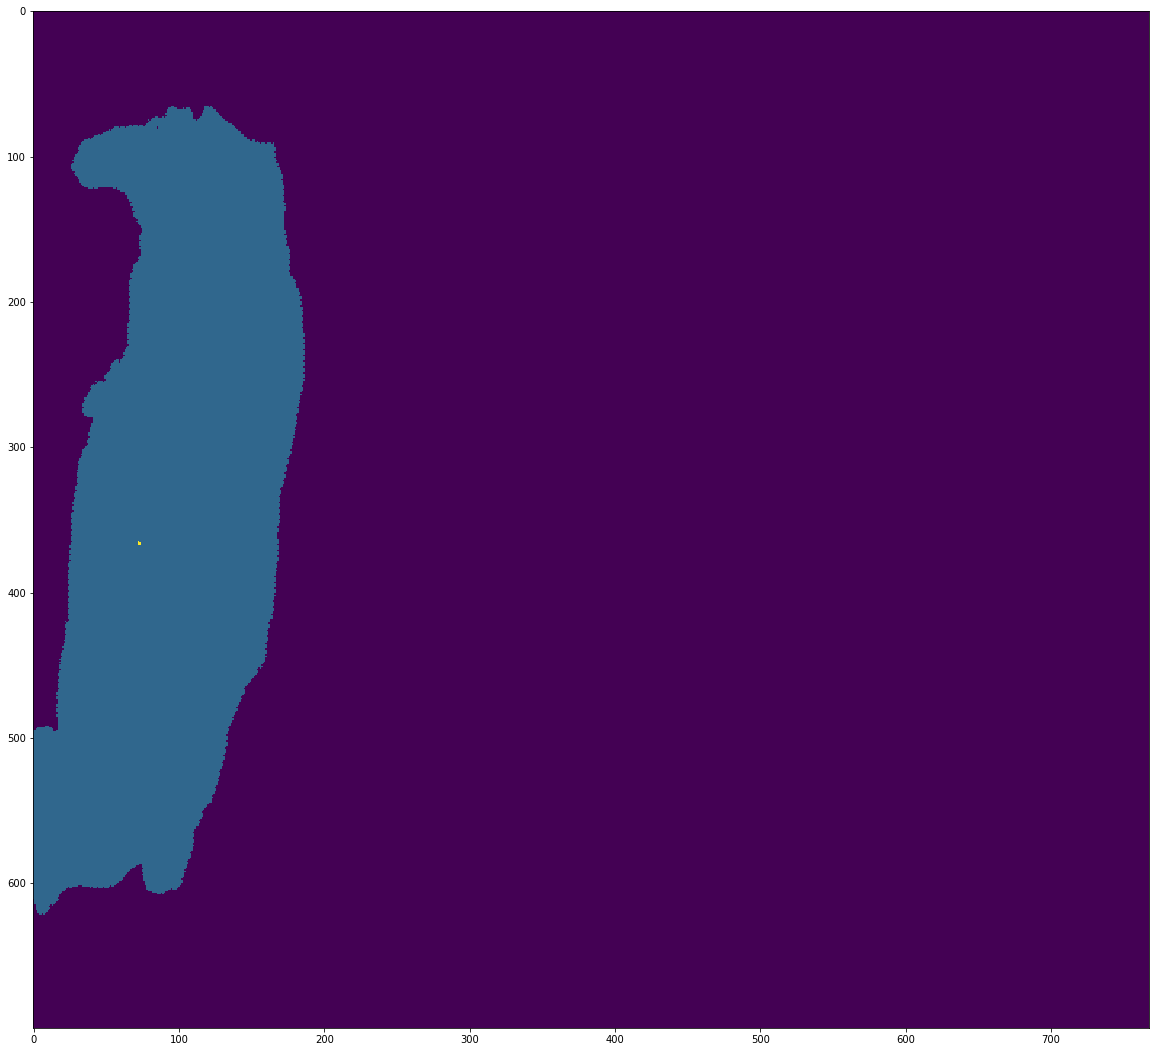

/home/thor/School/Scripts/data/masks/MAGNA_55_-1CL_0.454831kg.tif


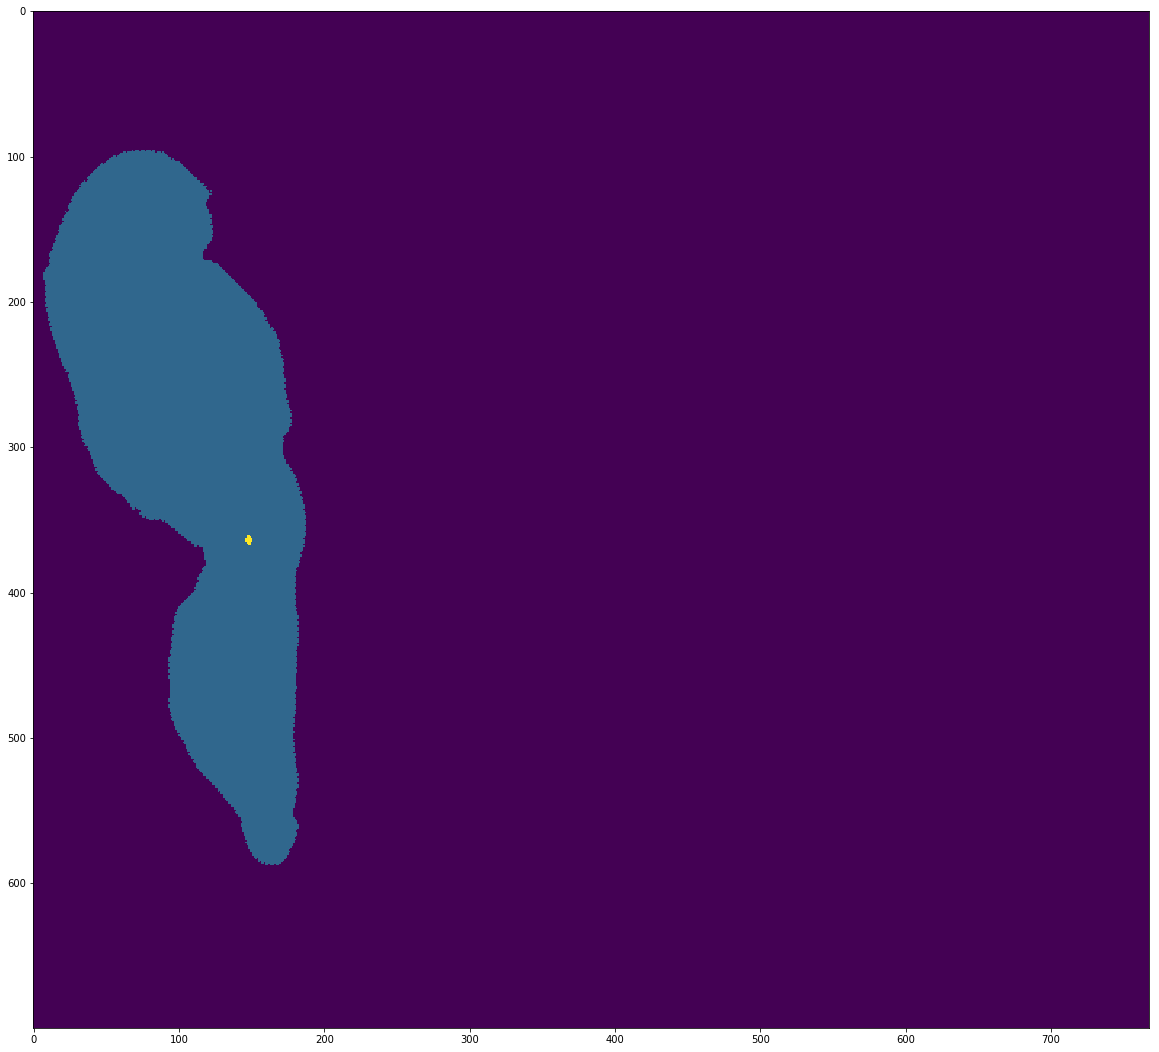

/home/thor/School/Scripts/data/masks/MAGNA_56_-1CL_0.446517kg.tif


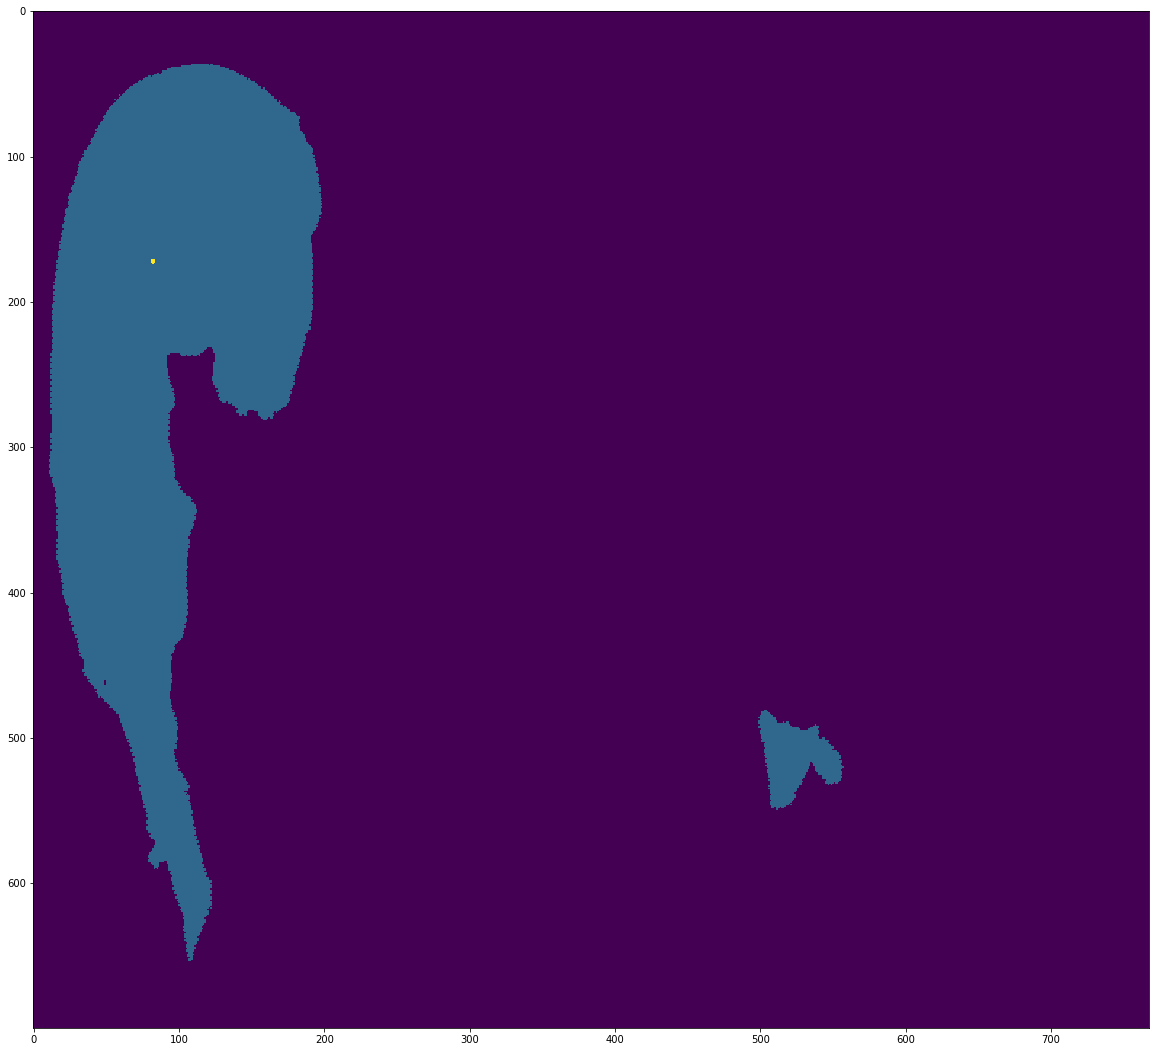

/home/thor/School/Scripts/data/masks/MAGNA_57_-1CL_0.442111kg.tif


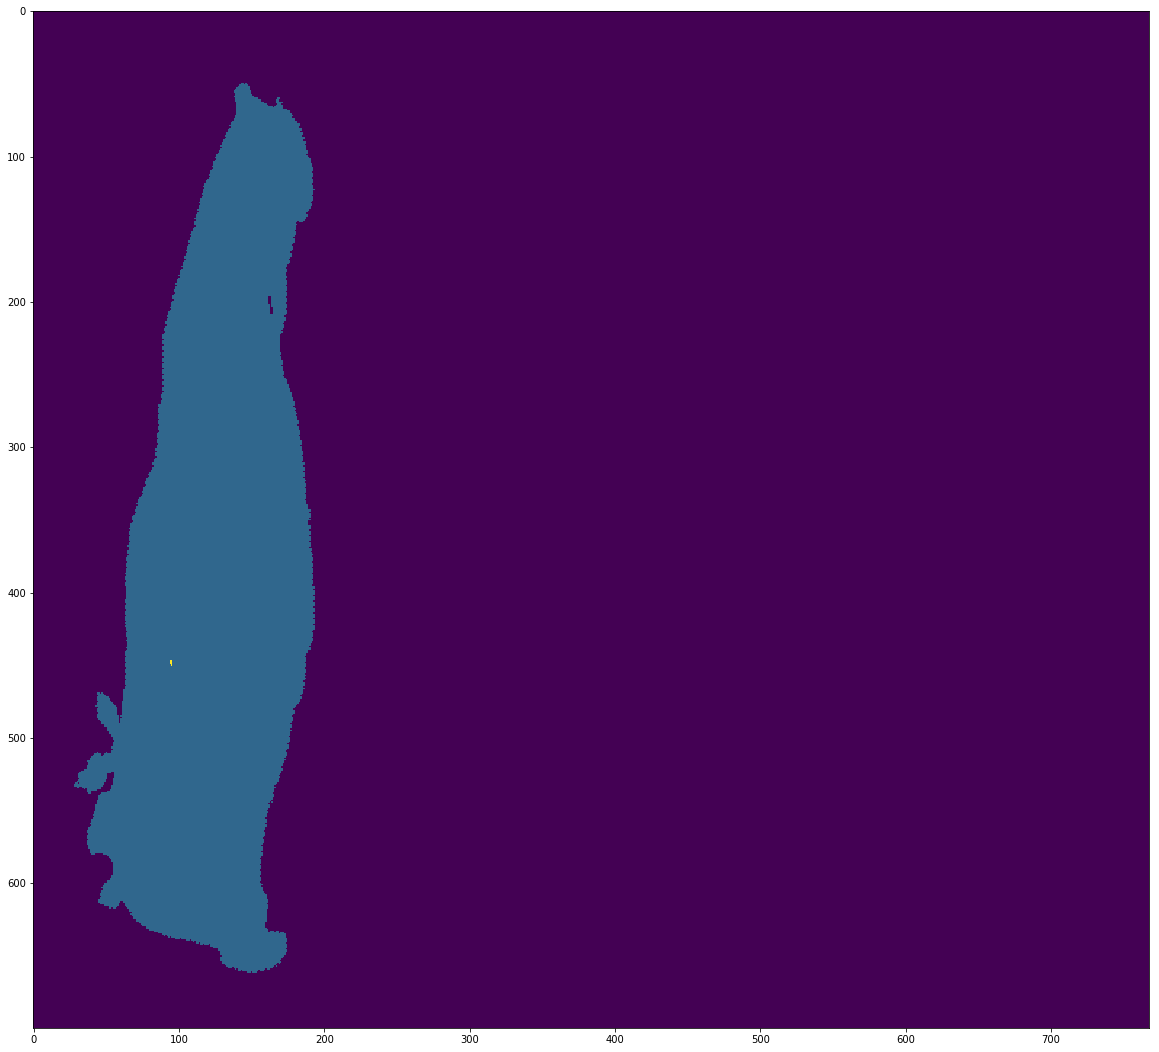

/home/thor/School/Scripts/data/masks/MAGNA_58_-1CL_0.453068kg.tif


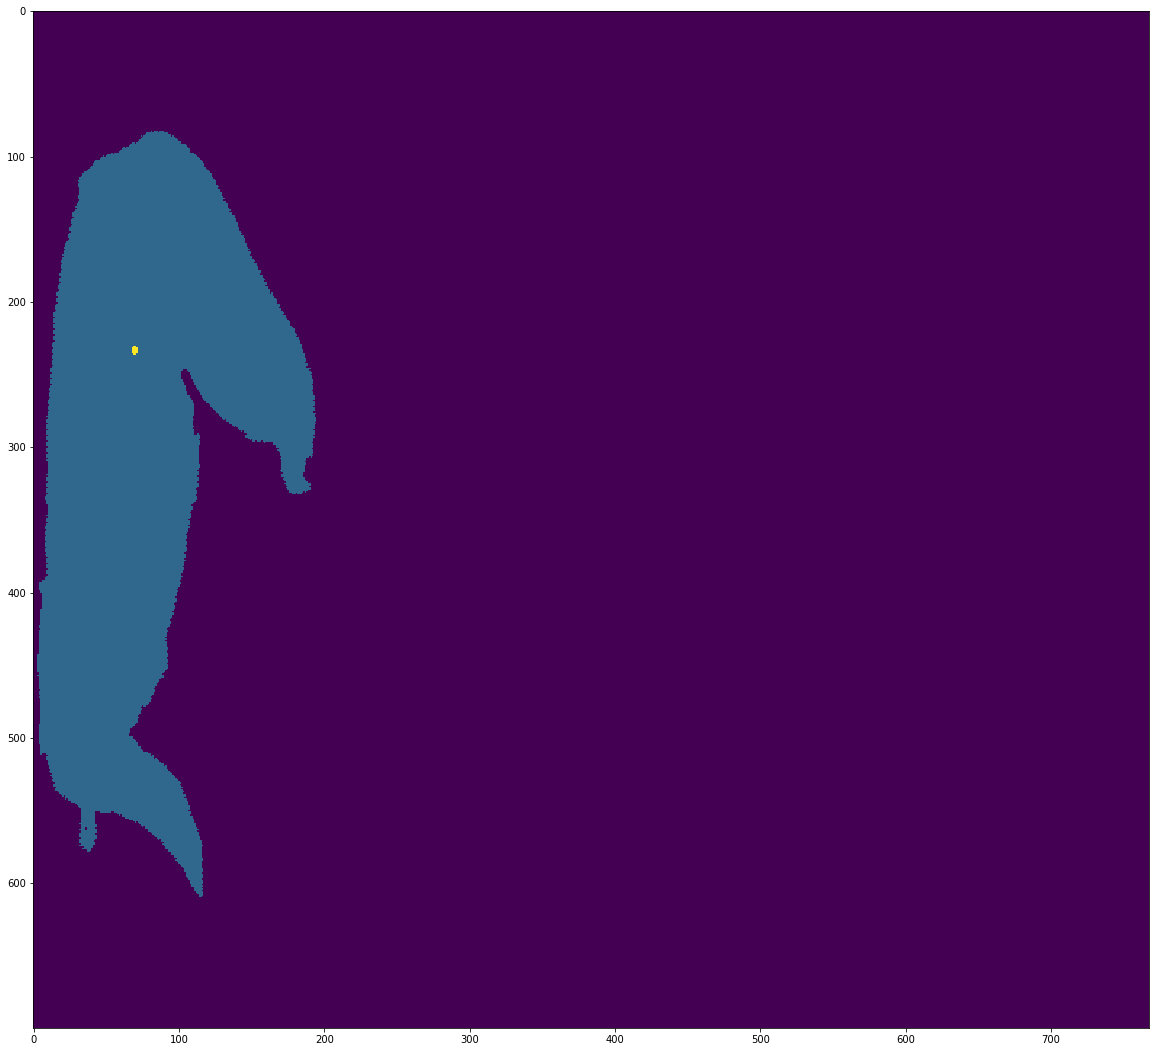

/home/thor/School/Scripts/data/masks/MAGNA_59_-1CL_0.328768kg.tif


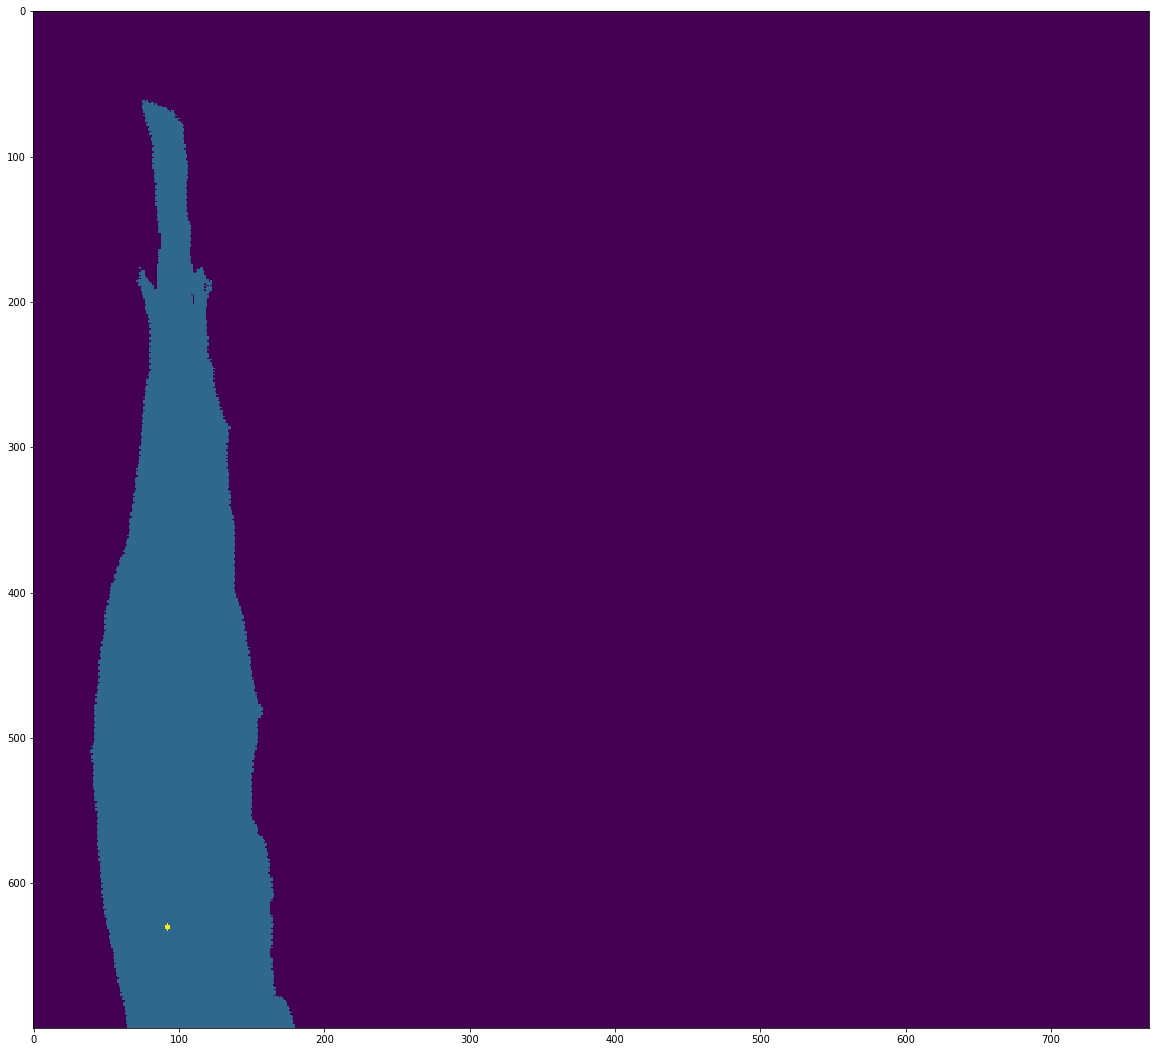

/home/thor/School/Scripts/data/masks/MAGNA_60_-1CL_0.439103kg.tif


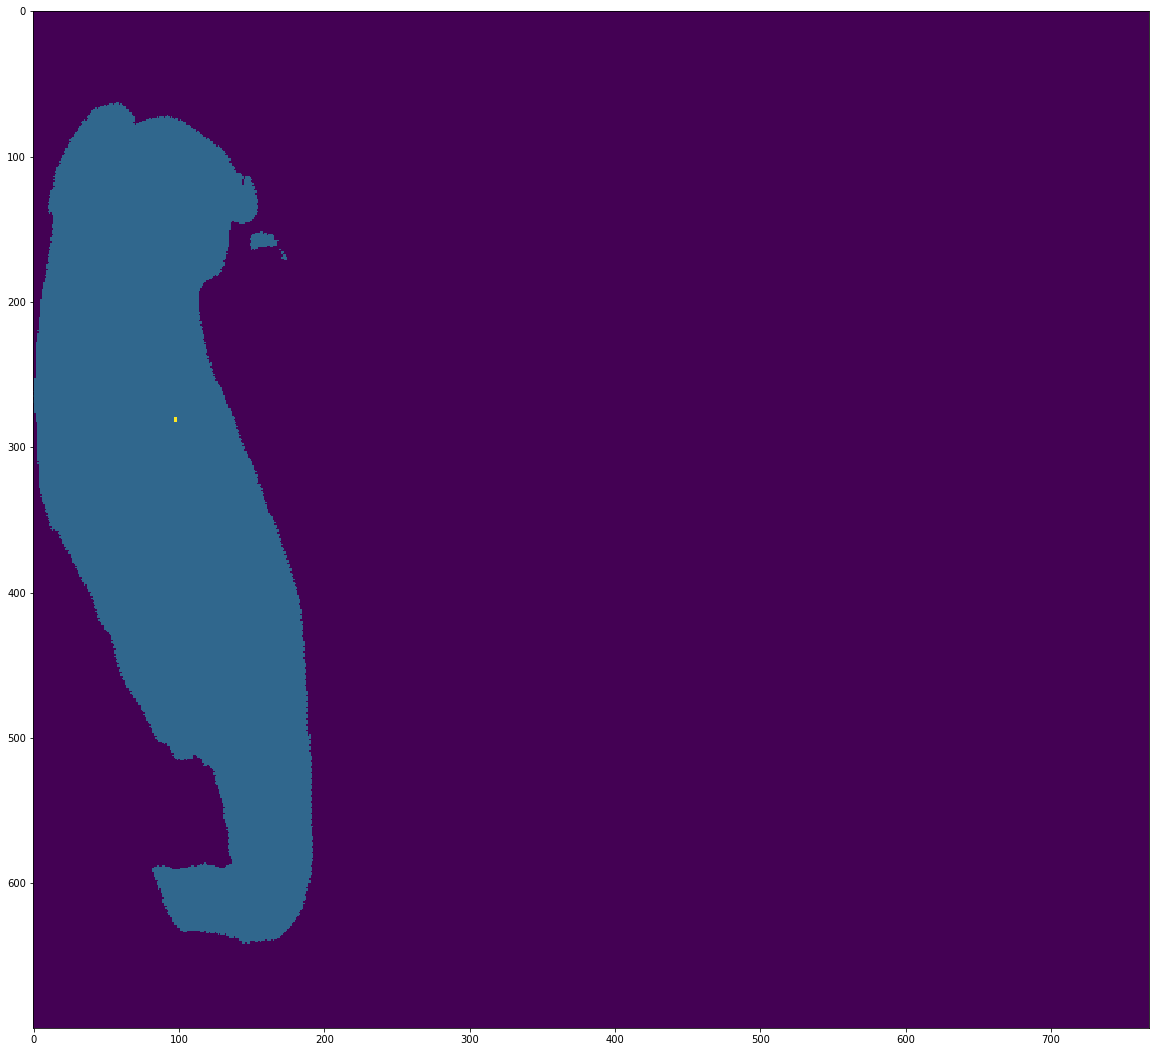

/home/thor/School/Scripts/data/masks/MAGNA_61_83.7706CL_3.88116kg.tif


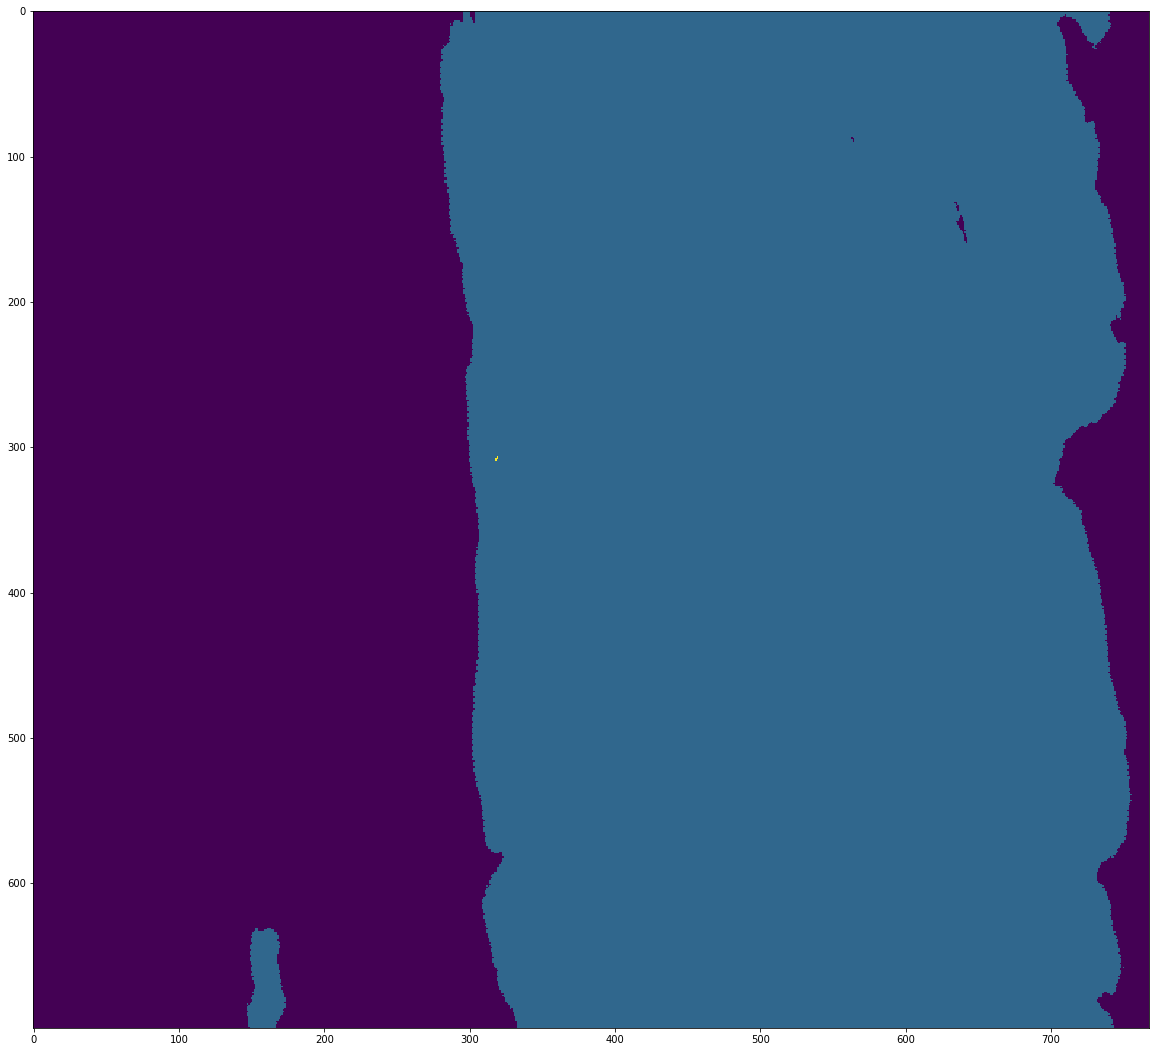

In [44]:
## All metal images:
metal = ['/home/thor/School/Scripts/data/masks/MAGNA_3_86.3626CL_3.97524kg.tif',
'/home/thor/School/Scripts/data/masks/MAGNA_20_78.9422CL_0.960883kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_48_-1CL_0.437527kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_49_-1CL_0.440395kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_50_-1CL_0.317512kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_51_-1CL_0.453667kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_52_-1CL_0.360127kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_53_-1CL_0.446551kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_54_-1CL_0.441927kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_55_-1CL_0.454831kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_56_-1CL_0.446517kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_57_-1CL_0.442111kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_58_-1CL_0.453068kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_59_-1CL_0.328768kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_60_-1CL_0.439103kg.tif', 
'/home/thor/School/Scripts/data/masks/MAGNA_61_83.7706CL_3.88116kg.tif']

for name in metal: # lbl_names:
    img = open_image(name, div=False)
    
    if 3 in np.unique(img.data):
        print(name)
#         print(np.unique(img.data))
#         print(len(img.data[img.data==3]))
#         print(img.data[img.data==3])
#         print(img.data.size())
        
        plt.figure(figsize = (20,20))
        plt.imshow(img.data[0])
        plt.show()
        #open_image(name, div=True).show(figsize=(5,5))


In [39]:
# open_image(name, div=True).show(figsize=(5,5))
# plt.figure(figsize = (20,20))
# plt.imshow(img.data[0])
# plt.show()

In [32]:
count = 0
for idx, name in enumerate(lbl_names):
    img = open_image(name, div=False)
    
    values = np.unique(img.data)
    if ((3 not in values) and (2 not in values)):
#         print("No contaminant found in this image")
#         print(img.data)
#         print(np.unique(img.data))
        print(name)
#         print(np.unique(img.data))
#         print(len(img.data[img.data==3]))
#         print(img.data[img.data==3])
#         print(img.data.size())
        
#         plt.imshow(img.data[0])
#         plt.show()
        #open_image(name, div=True).show(figsize=(5,5))
        count += 1
        

/home/thor/School/Scripts/data/masks/MAGNA_68_80.6901CL_0.297131kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_82_67.9813CL_3.39919kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_4_87.0527CL_3.52707kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_33_74.9812CL_3.9988kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_62_-1CL_0.52689kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_76_76.0002CL_2.10312kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_72_78.0834CL_3.01032kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_36_-1CL_0.38353kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_87_82.5236CL_3.41696kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_64_67.317CL_3.55601kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_49_80.6204CL_2.3658kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_57_-1CL_0.01426kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_41_79.3921CL_0.0100309kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_85_80.9566CL_3.52778kg.tif
/home/thor/School/Scripts/data/masks

/home/thor/School/Scripts/data/masks/MAGNA_98_95.7141CL_0.0453525kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_53_81.0677CL_3.9266kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_26_78.2528CL_3.47842kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_63_58.2647CL_3.29934kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_44_94.1518CL_1.2497kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_36_84.6468CL_3.36832kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_88_79.2087CL_3.88988kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_3_81.166CL_3.30826kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_83_79.9307CL_3.62975kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_4_78.3824CL_3.43523kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_74_-1CL_0.0277462kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_46_95.1205CL_1.10004kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_97_72.4801CL_1.50878kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_78_-1CL_0.0290564kg.tif
/home/thor/School/Scripts/dat

/home/thor/School/Scripts/data/masks/MAGNA_51_75.0941CL_3.31324kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_88_72.4614CL_3.13305kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_16_-1CL_0.011695kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_80_67.3904CL_3.01775kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_30_-1CL_0.0697413kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_86_-1CL_0.142048kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_24_-1CL_0.0337392kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_71_96.17CL_0.0177935kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_32_83.5199CL_3.1396kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_85_76.6878CL_3.475kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_52_81.3151CL_3.60191kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_94_77.7209CL_3.33686kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_12_81.2775CL_3.65463kg.tif
/home/thor/School/Scripts/data/masks/MAGNA_89_85.5155CL_2.07934kg.tif
/home/thor/School/Scripts/data/masks/